In [113]:
# Importing all necessary libraries
import matplotlib.pyplot as plt
import json
from math import *

In [118]:
# Create a list with of amounts of data for this experiment
data_amounts = [0, 1000, 2000, 3000, 6000, 9000, 12000, 15000, 17379]
base_path = "/Users/pavelvavilov/Desktop/Topology_in_Neural_Networks/bike_dataset/bike_output/exp_3/weights_graphs_mlp"

In [119]:
def read_barcode_data(barcode_json_path: str) -> list:
    ''' 
    Returns data from JSON file, sorted with NNs layers
    Params:
    barcode_json_path - path to file with data
    Return:
    layer1, ..., layer6 - six lists with data for each layer
    '''
    with open(barcode_json_path, 'r') as data:
        barcodes = json.load(data)

    layer1, layer2, layer3, layer4, layer5, layer6 = list(), list(), list(), list(), list(), list()

    for epoch in list(barcodes.keys()):
        layer1.append(barcodes[epoch]['layer1'])
        layer2.append(barcodes[epoch]['layer2'])
        layer3.append(barcodes[epoch]['layer3'])
        layer4.append(barcodes[epoch]['layer4'])
        layer5.append(barcodes[epoch]['layer5'])
        layer6.append(barcodes[epoch]['layer6'])

    return layer1, layer2, layer3, layer4, layer5, layer6

def load_barcode_data(amounts: list, base_path: str) -> dict:
    ''' 
    Call read_barcode_data func and put it in one dict with amount of data
    as a key and a list of data as a value
    Params:
    amounts - list with data amount numbers
    base_path - common path to all files with data 
    Return:
    Dictionary with data amounts as keys and the data as values 
    '''
    barcode_data = {}
    for amount in amounts:
        path = f"{base_path}_DataAmount{amount}/barcodes/barcode_data.json"
        barcode_data[amount] = read_barcode_data(barcode_json_path=path)
    return barcode_data

In [120]:
# Loading data
barcode_layers = load_barcode_data(data_amounts, base_path)

In [124]:
def calculate_homology_mean_lifetime(layer: list) -> float:
    ''' 
    Calculates the homogies mean lfietimes for one layer
    Params:
    layer - data for one layer
    Return:
    Mean lifetime value
    '''
    last_epoch = layer[-1]['H0']
    lifetime = 0

    for i in range(len(last_epoch)):
        mean = (last_epoch[i][0] + last_epoch[i][1]) / 2
        lifetime += mean 

    mean_lifetime = lifetime / len(layer)

    return mean_lifetime

In [125]:
# Calculate the mean lifetime of the homologies in each layer for each amount of data
mean_lifetime_1_0k = calculate_homology_mean_lifetime(barcode_layers[0][0])
mean_lifetime_1_1k = calculate_homology_mean_lifetime(barcode_layers[1000][0])
mean_lifetime_1_2k = calculate_homology_mean_lifetime(barcode_layers[2000][0])
mean_lifetime_1_3k = calculate_homology_mean_lifetime(barcode_layers[3000][0])
mean_lifetime_1_6k = calculate_homology_mean_lifetime(barcode_layers[6000][0])
mean_lifetime_1_9k = calculate_homology_mean_lifetime(barcode_layers[9000][0])
mean_lifetime_1_12k = calculate_homology_mean_lifetime(barcode_layers[12000][0])
mean_lifetime_1_15k = calculate_homology_mean_lifetime(barcode_layers[15000][0])
mean_lifetime_1_17k = calculate_homology_mean_lifetime(barcode_layers[17379][0])
mean_lifetime_2_0k = calculate_homology_mean_lifetime(barcode_layers[0][1])
mean_lifetime_2_1k = calculate_homology_mean_lifetime(barcode_layers[1000][1])
mean_lifetime_2_2k = calculate_homology_mean_lifetime(barcode_layers[2000][1])
mean_lifetime_2_3k = calculate_homology_mean_lifetime(barcode_layers[3000][1])
mean_lifetime_2_6k = calculate_homology_mean_lifetime(barcode_layers[6000][1])
mean_lifetime_2_9k = calculate_homology_mean_lifetime(barcode_layers[9000][1])
mean_lifetime_2_12k = calculate_homology_mean_lifetime(barcode_layers[12000][1])
mean_lifetime_2_15k = calculate_homology_mean_lifetime(barcode_layers[15000][1])
mean_lifetime_2_17k = calculate_homology_mean_lifetime(barcode_layers[17379][1])
mean_lifetime_3_0k = calculate_homology_mean_lifetime(barcode_layers[0][2])
mean_lifetime_3_1k = calculate_homology_mean_lifetime(barcode_layers[1000][2])
mean_lifetime_3_2k = calculate_homology_mean_lifetime(barcode_layers[2000][2])
mean_lifetime_3_3k = calculate_homology_mean_lifetime(barcode_layers[3000][2])
mean_lifetime_3_6k = calculate_homology_mean_lifetime(barcode_layers[6000][2])
mean_lifetime_3_9k = calculate_homology_mean_lifetime(barcode_layers[9000][2])
mean_lifetime_3_12k = calculate_homology_mean_lifetime(barcode_layers[12000][2])
mean_lifetime_3_15k = calculate_homology_mean_lifetime(barcode_layers[15000][2])
mean_lifetime_3_17k = calculate_homology_mean_lifetime(barcode_layers[17379][2])
mean_lifetime_4_0k = calculate_homology_mean_lifetime(barcode_layers[0][3])
mean_lifetime_4_1k = calculate_homology_mean_lifetime(barcode_layers[1000][3])
mean_lifetime_4_2k = calculate_homology_mean_lifetime(barcode_layers[2000][3])
mean_lifetime_4_3k = calculate_homology_mean_lifetime(barcode_layers[3000][3])
mean_lifetime_4_6k = calculate_homology_mean_lifetime(barcode_layers[6000][3])
mean_lifetime_4_9k = calculate_homology_mean_lifetime(barcode_layers[9000][3])
mean_lifetime_4_12k = calculate_homology_mean_lifetime(barcode_layers[12000][3])
mean_lifetime_4_15k = calculate_homology_mean_lifetime(barcode_layers[15000][3])
mean_lifetime_4_17k = calculate_homology_mean_lifetime(barcode_layers[17379][3])
mean_lifetime_5_0k = calculate_homology_mean_lifetime(barcode_layers[0][4])
mean_lifetime_5_1k = calculate_homology_mean_lifetime(barcode_layers[1000][4])
mean_lifetime_5_2k = calculate_homology_mean_lifetime(barcode_layers[2000][4])
mean_lifetime_5_3k = calculate_homology_mean_lifetime(barcode_layers[3000][4])
mean_lifetime_5_6k = calculate_homology_mean_lifetime(barcode_layers[6000][4])
mean_lifetime_5_9k = calculate_homology_mean_lifetime(barcode_layers[9000][4])
mean_lifetime_5_12k = calculate_homology_mean_lifetime(barcode_layers[12000][4])
mean_lifetime_5_15k = calculate_homology_mean_lifetime(barcode_layers[15000][4])
mean_lifetime_5_17k = calculate_homology_mean_lifetime(barcode_layers[17379][4])
mean_lifetime_6_0k = calculate_homology_mean_lifetime(barcode_layers[0][5])
mean_lifetime_6_1k = calculate_homology_mean_lifetime(barcode_layers[1000][5])
mean_lifetime_6_2k = calculate_homology_mean_lifetime(barcode_layers[2000][5])
mean_lifetime_6_3k = calculate_homology_mean_lifetime(barcode_layers[3000][5])
mean_lifetime_6_6k = calculate_homology_mean_lifetime(barcode_layers[6000][5])
mean_lifetime_6_9k = calculate_homology_mean_lifetime(barcode_layers[9000][5])
mean_lifetime_6_12k = calculate_homology_mean_lifetime(barcode_layers[12000][5])
mean_lifetime_6_15k = calculate_homology_mean_lifetime(barcode_layers[15000][5])
mean_lifetime_6_17k = calculate_homology_mean_lifetime(barcode_layers[17379][5])

In [126]:
# Create a total list of homologies lifetime through all data amounts
layer1_total = [mean_lifetime_1_0k, mean_lifetime_1_1k, mean_lifetime_1_2k, mean_lifetime_1_3k, mean_lifetime_1_6k, mean_lifetime_1_9k, mean_lifetime_1_12k, mean_lifetime_1_15k, mean_lifetime_1_17k]
layer2_total = [mean_lifetime_2_0k, mean_lifetime_2_1k, mean_lifetime_2_2k, mean_lifetime_2_3k, mean_lifetime_2_6k, mean_lifetime_2_9k, mean_lifetime_2_12k, mean_lifetime_2_15k, mean_lifetime_2_17k]
layer3_total = [mean_lifetime_3_0k, mean_lifetime_3_1k, mean_lifetime_3_2k, mean_lifetime_3_3k, mean_lifetime_3_6k, mean_lifetime_3_9k, mean_lifetime_3_12k, mean_lifetime_3_15k, mean_lifetime_3_17k]
layer4_total = [mean_lifetime_4_0k, mean_lifetime_4_1k, mean_lifetime_4_2k, mean_lifetime_4_3k, mean_lifetime_4_6k, mean_lifetime_4_9k, mean_lifetime_4_12k, mean_lifetime_4_15k, mean_lifetime_4_17k]
layer5_total = [mean_lifetime_5_0k, mean_lifetime_5_1k, mean_lifetime_5_2k, mean_lifetime_5_3k, mean_lifetime_5_6k, mean_lifetime_5_9k, mean_lifetime_5_12k, mean_lifetime_5_15k, mean_lifetime_5_17k]
layer6_total = [mean_lifetime_6_0k, mean_lifetime_6_1k, mean_lifetime_6_2k, mean_lifetime_6_3k, mean_lifetime_6_6k, mean_lifetime_6_9k, mean_lifetime_6_12k, mean_lifetime_6_15k, mean_lifetime_6_17k]

In [127]:
layers = [layer1_total, layer2_total, layer3_total, layer4_total, layer5_total, layer6_total]

In [128]:
def plot_homologies_mean_lifetime_for_one_layer(mean_lifetime_value: float, data_amounts: list, layer_name: str) -> None:
    ''' 
    Build the graphs for data amounts and mean lifetime values
    Params:
    mean_lifetime_value - list of mean lifetime values
    data_amounts - list of data amounts for this experiment
    layer_name - name of a NNs hidden layer the graph belongs to
    Return:
    Graph for data amounts and mean lifetime values 
    '''
    plt.plot(data_amounts, mean_lifetime_value, marker='o')
    plt.title(layer_name)
    plt.xlabel('Data amounts')
    plt.ylabel('Mean lifetime')
    plt.grid(True)

    plt.show() 

In [ ]:
# for i in range(1, 7):
#     plot_homologies_mean_lifetime_for_one_layer(layers[i - 1], data_amounts, f'Layer {i}')

In [129]:
def plot_graphs_grid(data_amounts: list, layers: list) -> None:
    ''' 
    Plots a grid of graphs for mean lifetime through the data amounts for each layer
    Params:
    data_amounts - list with data amounts
    layers - list with lists with layer data
    Return:
    None
    '''
    # Create figure and grid with 3 rows and 2 columns with common X axis
    fig, axes = plt.subplots(3, 2, figsize=(10, 8), sharex=True)

    # Fill in the graphs
    for i, ax in enumerate(axes.flat):
        ax.plot(data_amounts, layers[i])
        ax.legend()
        ax.set_title(f'Layer {i+1}')
        ax.grid(True)

    # Label for common X axis
    fig.text(0.5, 0.04, 'Data amounts', ha='center', fontsize=12)
    fig.text(0.0001, 0.5, 'Mean lifetime', va='center', rotation='vertical', fontsize=12)

    # Add space between graphs
    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Оставляем место для общей подписи
    plt.show()

/var/folders/nd/fsmv2lz93k3_cjwz_1lx75j80000gn/T/ipykernel_96825/236972928.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


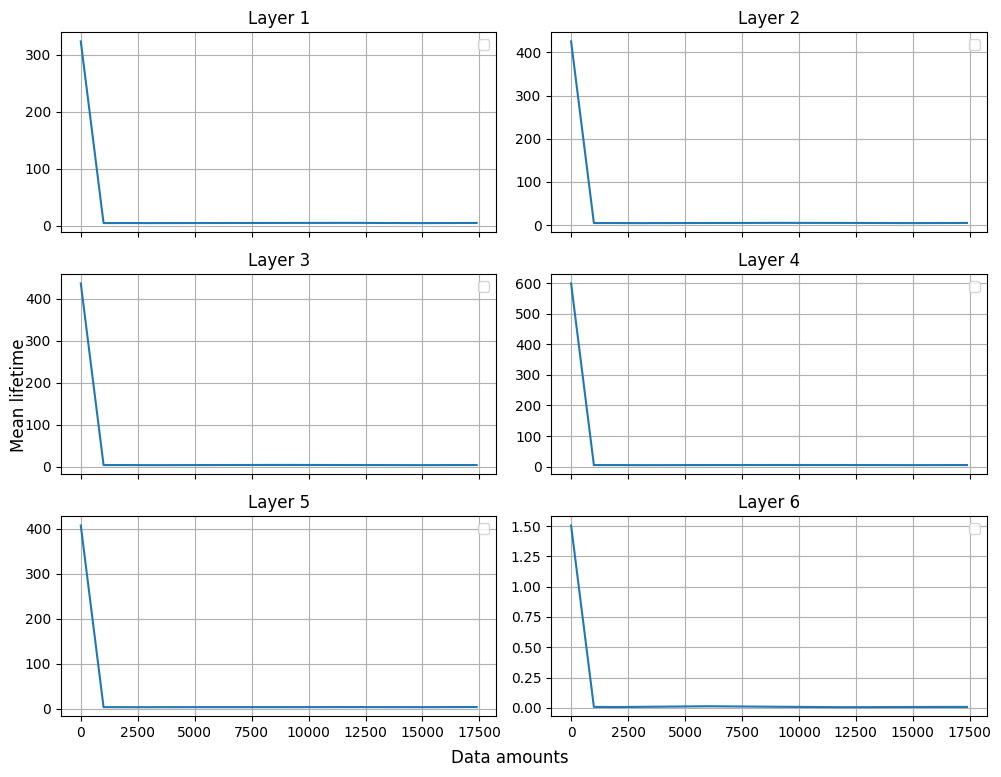

In [130]:
plot_graphs_grid(data_amounts=data_amounts, layers=layers)

In [134]:
# ml - mean lifetime
def plot_ml_first_points(layers: list, data_amount: int) -> None:
    ''' 
    Plots graph for start mean lifetime points per each layer 
    Params:
    layers - list with mean lifetimes for each layer
    data_amount - 0-0, 1-1000, 2-2000, 3-3000, 4-6000, 5-9000, 6-12000, 7-15000, 8-17379
    Return:
    None
    '''
    l = [1, 2, 3, 4, 5, 6]
    first_point = [lay[data_amount] for lay in layers]

    plt.plot(l, first_point, marker='o')
    plt.title('Mean lifetime start points per layer')
    plt.xlabel('Layer')
    plt.ylabel('Mean lfietime')
    plt.grid(True)

    plt.show()

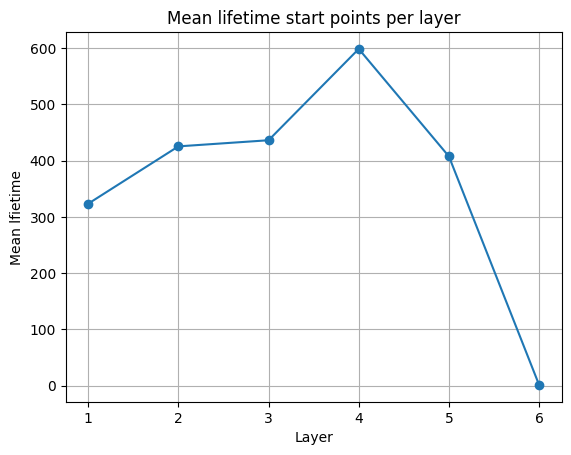

In [135]:
plot_ml_first_points(layers, 0)

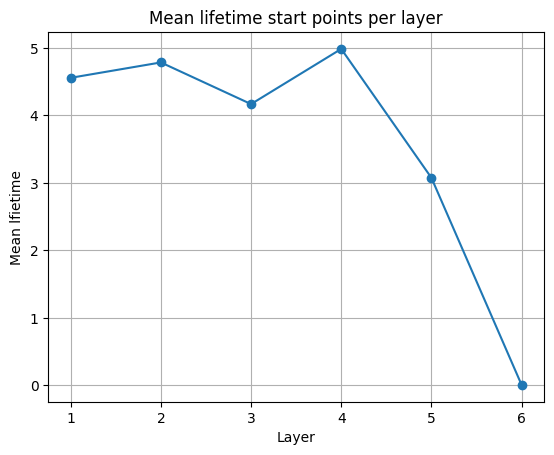

In [136]:
plot_ml_first_points(layers, 1)

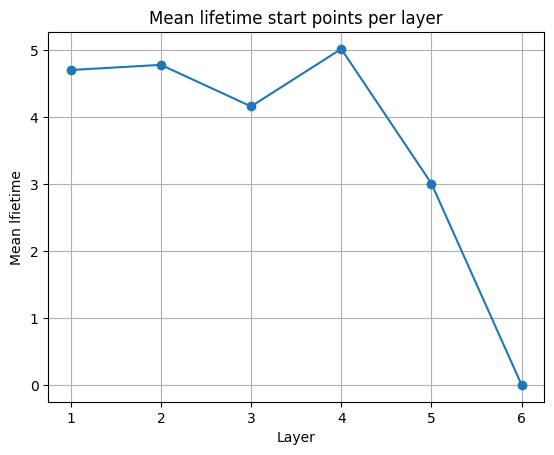

In [137]:
plot_ml_first_points(layers, 2)

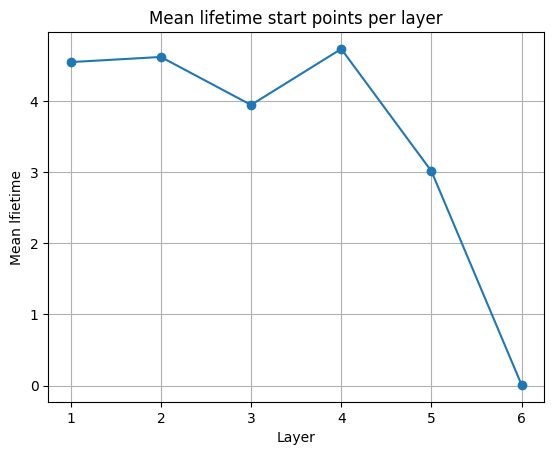

In [138]:
plot_ml_first_points(layers, 3)

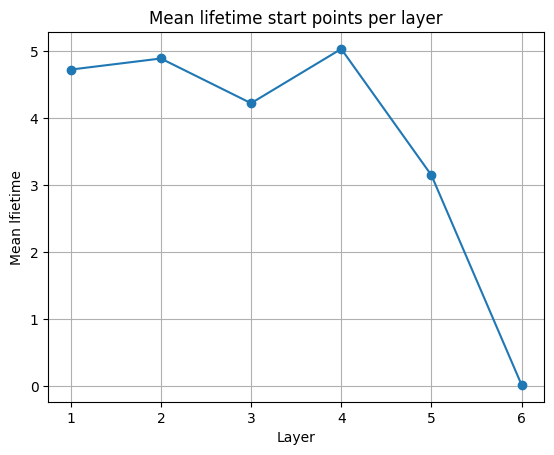

In [139]:
plot_ml_first_points(layers, 4)

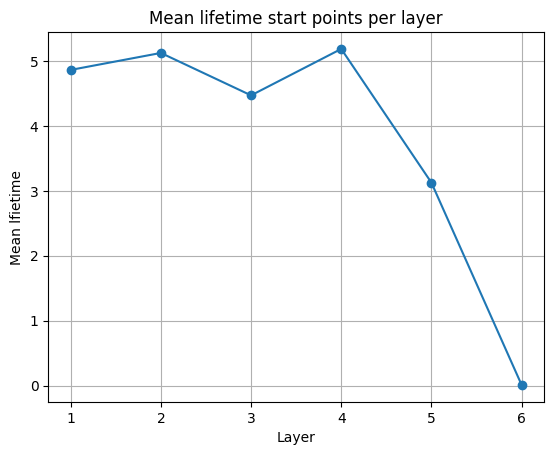

In [140]:
plot_ml_first_points(layers, 5)

In [141]:
def calculate_entropy(layer: list) -> float:
    ''' 
    Calculates entropy for each layer in NNs
    Params:
    layer - data for one layer
    Return:
    Value of an entropy for with layer
    '''
    last_epoch = layer[-1]['H0']
    pair_difference = list()

    for pair in last_epoch:
        pair_difference.append(pair[1] - pair[0])
    
    result = list()
    for diff_pair in pair_difference:
        result.append(diff_pair / sum(pair_difference))

    h = 0
    for elem in result:
        if elem == 0:
            pass
        else:
            h =+ elem * log2(elem)

    return -h

In [143]:
layer1_0k_ent = calculate_entropy(barcode_layers[0][0])
layer1_1k_ent = calculate_entropy(barcode_layers[1000][0])
layer1_2k_ent = calculate_entropy(barcode_layers[2000][0])
layer1_3k_ent = calculate_entropy(barcode_layers[3000][0])
layer1_6k_ent = calculate_entropy(barcode_layers[6000][0])
layer1_9k_ent = calculate_entropy(barcode_layers[9000][0])
layer1_12k_ent = calculate_entropy(barcode_layers[12000][0])
layer1_15k_ent = calculate_entropy(barcode_layers[15000][0])
layer1_17k_ent = calculate_entropy(barcode_layers[17379][0])
layer2_0k_ent = calculate_entropy(barcode_layers[0][1])
layer2_1k_ent = calculate_entropy(barcode_layers[1000][1])
layer2_2k_ent = calculate_entropy(barcode_layers[2000][1])
layer2_3k_ent = calculate_entropy(barcode_layers[3000][1])
layer2_6k_ent = calculate_entropy(barcode_layers[6000][1])
layer2_9k_ent = calculate_entropy(barcode_layers[9000][1])
layer2_12k_ent = calculate_entropy(barcode_layers[12000][1])
layer2_15k_ent = calculate_entropy(barcode_layers[15000][1])
layer2_17k_ent = calculate_entropy(barcode_layers[17379][1])
layer3_0k_ent = calculate_entropy(barcode_layers[0][2])
layer3_1k_ent = calculate_entropy(barcode_layers[1000][2])
layer3_2k_ent = calculate_entropy(barcode_layers[2000][2])
layer3_3k_ent = calculate_entropy(barcode_layers[3000][2])
layer3_6k_ent = calculate_entropy(barcode_layers[6000][2])
layer3_9k_ent = calculate_entropy(barcode_layers[9000][2])
layer3_12k_ent = calculate_entropy(barcode_layers[12000][2])
layer3_15k_ent = calculate_entropy(barcode_layers[15000][2])
layer3_17k_ent = calculate_entropy(barcode_layers[17379][2])
layer4_0k_ent = calculate_entropy(barcode_layers[0][3])
layer4_1k_ent = calculate_entropy(barcode_layers[1000][3])
layer4_2k_ent = calculate_entropy(barcode_layers[2000][3])
layer4_3k_ent = calculate_entropy(barcode_layers[3000][3])
layer4_6k_ent = calculate_entropy(barcode_layers[6000][3])
layer4_9k_ent = calculate_entropy(barcode_layers[9000][3])
layer4_12k_ent = calculate_entropy(barcode_layers[12000][3])
layer4_15k_ent = calculate_entropy(barcode_layers[15000][3])
layer4_17k_ent = calculate_entropy(barcode_layers[17379][3])
layer5_0k_ent = calculate_entropy(barcode_layers[0][4])
layer5_1k_ent = calculate_entropy(barcode_layers[1000][4])
layer5_2k_ent = calculate_entropy(barcode_layers[2000][4])
layer5_3k_ent = calculate_entropy(barcode_layers[3000][4])
layer5_6k_ent = calculate_entropy(barcode_layers[6000][4])
layer5_9k_ent = calculate_entropy(barcode_layers[9000][4])
layer5_12k_ent = calculate_entropy(barcode_layers[12000][4])
layer5_15k_ent = calculate_entropy(barcode_layers[15000][4])
layer5_17k_ent = calculate_entropy(barcode_layers[17379][4])
layer6_0k_ent = calculate_entropy(barcode_layers[0][5])
layer6_1k_ent = calculate_entropy(barcode_layers[1000][5])
layer6_2k_ent = calculate_entropy(barcode_layers[2000][5])
layer6_3k_ent = calculate_entropy(barcode_layers[3000][5])
layer6_6k_ent = calculate_entropy(barcode_layers[6000][5])
layer6_9k_ent = calculate_entropy(barcode_layers[9000][5])
layer6_12k_ent = calculate_entropy(barcode_layers[12000][5])
layer6_15k_ent = calculate_entropy(barcode_layers[15000][5])
layer6_17k_ent = calculate_entropy(barcode_layers[17379][5])

In [144]:
layer1_entropy = [layer1_0k_ent, layer1_1k_ent, layer1_2k_ent, layer1_3k_ent, layer1_6k_ent, layer1_9k_ent, layer1_12k_ent, layer1_15k_ent, layer1_17k_ent]
layer2_entropy = [layer2_0k_ent, layer2_1k_ent, layer2_2k_ent, layer2_3k_ent, layer2_6k_ent, layer2_9k_ent, layer2_12k_ent, layer2_15k_ent, layer2_17k_ent]
layer3_entropy = [layer3_0k_ent, layer3_1k_ent, layer3_2k_ent, layer3_3k_ent, layer3_6k_ent, layer3_9k_ent, layer3_12k_ent, layer3_15k_ent, layer3_17k_ent]
layer4_entropy = [layer4_0k_ent, layer4_1k_ent, layer4_2k_ent, layer4_3k_ent, layer4_6k_ent, layer4_9k_ent, layer4_12k_ent, layer4_15k_ent, layer4_17k_ent]
layer5_entropy = [layer5_0k_ent, layer5_1k_ent, layer5_2k_ent, layer5_3k_ent, layer5_6k_ent, layer5_9k_ent, layer5_12k_ent, layer5_15k_ent, layer5_17k_ent]
layer6_entropy = [layer6_0k_ent, layer6_1k_ent, layer6_2k_ent, layer6_3k_ent, layer6_6k_ent, layer6_9k_ent, layer6_12k_ent, layer6_15k_ent, layer6_17k_ent]

layers_ent = [layer1_entropy, layer2_entropy, layer3_entropy, layer4_entropy, layer5_entropy, layer6_entropy]

In [145]:
def plot_entropy_for_one_layer(ent_value: float, data_amounts: list, layer_name: str, name: str) -> None:
    ''' 
    Build the graphs for data amounts and entropy values
    Params:
    ent_value - list of entropy values
    data_amounts - list of data amounts for this experiment
    layer_name - name of a NNs hidden layer the graph belongs to
    Return:
    Graph for data amounts and entropy values 
    '''
    plt.plot(data_amounts, ent_value, marker='o')
    plt.title(layer_name)
    plt.xlabel('Data amounts')
    plt.ylabel(name)
    plt.grid(True)

    plt.show() 

In [ ]:
# for i in range(1, 7):
#     plot_entropy_for_one_layer(layers_ent[i - 1], data_amounts, f'Layer {i}', name="Entropy")

/var/folders/nd/fsmv2lz93k3_cjwz_1lx75j80000gn/T/ipykernel_96825/236972928.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


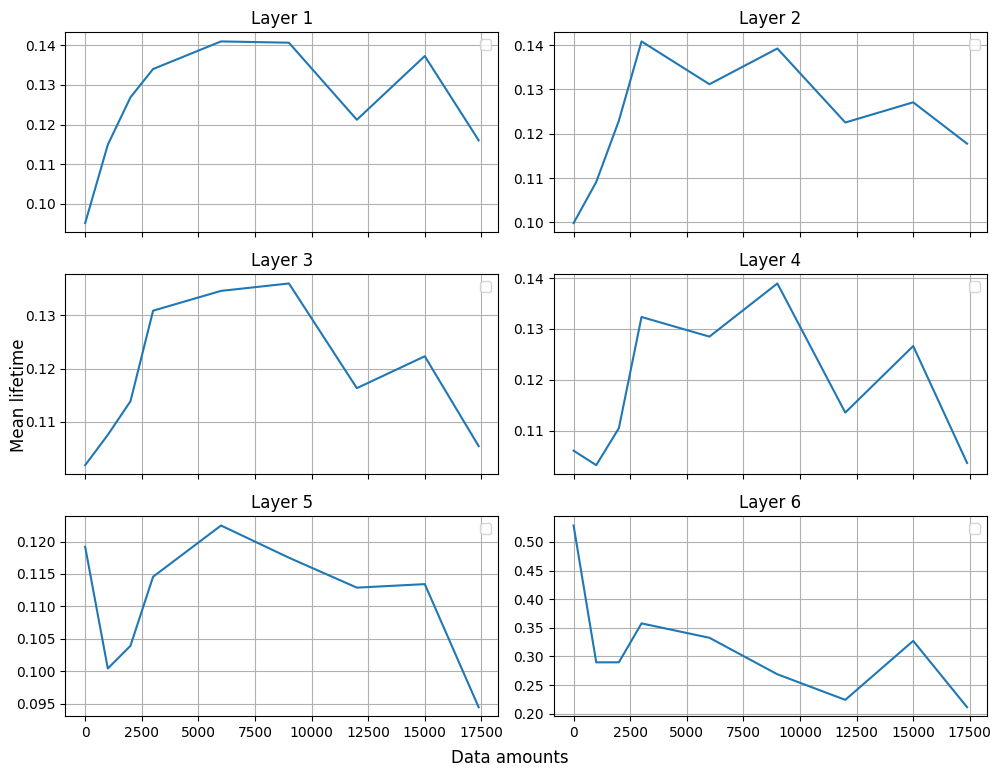

In [146]:
plot_graphs_grid(data_amounts=data_amounts, layers=layers_ent)

In [147]:
def calculate_norm_persist_entropy(layer: list) -> list:
    ''' 
    Calculates normalized persistent entropy from basic entropy
    Params:
    layers_ent - list with entropy values for each layer and each data amount
    Return:
    Normilized entropy for specific layer and amount of data
    '''
    last_epoch = layer[-1]['H0']
    pair_difference = list()

    for pair in last_epoch:
        pair_difference.append(pair[1] - pair[0])
    
    result = list()
    for diff_pair in pair_difference:
        result.append(diff_pair / sum(pair_difference))

    h = 0
    for elem in result:
        if elem == 0:
            pass
        else:
            h =+ elem * log2(elem)

    return -h / log2(len(pair_difference))

In [148]:
layer1_0k_norm_ent = calculate_norm_persist_entropy(barcode_layers[0][0])
layer1_1k_norm_ent = calculate_norm_persist_entropy(barcode_layers[1000][0])
layer1_2k_norm_ent = calculate_norm_persist_entropy(barcode_layers[2000][0])
layer1_3k_norm_ent = calculate_norm_persist_entropy(barcode_layers[3000][0])
layer1_6k_norm_ent = calculate_norm_persist_entropy(barcode_layers[6000][0])
layer1_9k_norm_ent = calculate_norm_persist_entropy(barcode_layers[9000][0])
layer1_12k_norm_ent = calculate_norm_persist_entropy(barcode_layers[12000][0])
layer1_15k_norm_ent = calculate_norm_persist_entropy(barcode_layers[15000][0])
layer1_17k_norm_ent = calculate_norm_persist_entropy(barcode_layers[17379][0])
layer2_0k_norm_ent = calculate_norm_persist_entropy(barcode_layers[0][1])
layer2_1k_norm_ent = calculate_norm_persist_entropy(barcode_layers[1000][1])
layer2_2k_norm_ent = calculate_norm_persist_entropy(barcode_layers[2000][1])
layer2_3k_norm_ent = calculate_norm_persist_entropy(barcode_layers[3000][1])
layer2_6k_norm_ent = calculate_norm_persist_entropy(barcode_layers[6000][1])
layer2_9k_norm_ent = calculate_norm_persist_entropy(barcode_layers[9000][1])
layer2_12k_norm_ent = calculate_norm_persist_entropy(barcode_layers[12000][1])
layer2_15k_norm_ent = calculate_norm_persist_entropy(barcode_layers[15000][1])
layer2_17k_norm_ent = calculate_norm_persist_entropy(barcode_layers[17379][1])
layer3_0k_norm_ent = calculate_norm_persist_entropy(barcode_layers[0][2])
layer3_1k_norm_ent = calculate_norm_persist_entropy(barcode_layers[1000][2])
layer3_2k_norm_ent = calculate_norm_persist_entropy(barcode_layers[2000][2])
layer3_3k_norm_ent = calculate_norm_persist_entropy(barcode_layers[3000][2])
layer3_6k_norm_ent = calculate_norm_persist_entropy(barcode_layers[6000][2])
layer3_9k_norm_ent = calculate_norm_persist_entropy(barcode_layers[9000][2])
layer3_12k_norm_ent = calculate_norm_persist_entropy(barcode_layers[12000][2])
layer3_15k_norm_ent = calculate_norm_persist_entropy(barcode_layers[15000][2])
layer3_17k_norm_ent = calculate_norm_persist_entropy(barcode_layers[17379][2])
layer4_0k_norm_ent = calculate_norm_persist_entropy(barcode_layers[0][3])
layer4_1k_norm_ent = calculate_norm_persist_entropy(barcode_layers[1000][3])
layer4_2k_norm_ent = calculate_norm_persist_entropy(barcode_layers[2000][3])
layer4_3k_norm_ent = calculate_norm_persist_entropy(barcode_layers[3000][3])
layer4_6k_norm_ent = calculate_norm_persist_entropy(barcode_layers[6000][3])
layer4_9k_norm_ent = calculate_norm_persist_entropy(barcode_layers[9000][3])
layer4_12k_norm_ent = calculate_norm_persist_entropy(barcode_layers[12000][3])
layer4_15k_norm_ent = calculate_norm_persist_entropy(barcode_layers[15000][3])
layer4_17k_norm_ent = calculate_norm_persist_entropy(barcode_layers[17379][3])
layer5_0k_norm_ent = calculate_norm_persist_entropy(barcode_layers[0][4])
layer5_1k_norm_ent = calculate_norm_persist_entropy(barcode_layers[1000][4])
layer5_2k_norm_ent = calculate_norm_persist_entropy(barcode_layers[2000][4])
layer5_3k_norm_ent = calculate_norm_persist_entropy(barcode_layers[3000][4])
layer5_6k_norm_ent = calculate_norm_persist_entropy(barcode_layers[6000][4])
layer5_9k_norm_ent = calculate_norm_persist_entropy(barcode_layers[9000][4])
layer5_12k_norm_ent = calculate_norm_persist_entropy(barcode_layers[12000][4])
layer5_15k_norm_ent = calculate_norm_persist_entropy(barcode_layers[15000][4])
layer5_17k_norm_ent = calculate_norm_persist_entropy(barcode_layers[17379][4])
layer6_0k_norm_ent = calculate_norm_persist_entropy(barcode_layers[0][5])
layer6_1k_norm_ent = calculate_norm_persist_entropy(barcode_layers[1000][5])
layer6_2k_norm_ent = calculate_norm_persist_entropy(barcode_layers[2000][5])
layer6_3k_norm_ent = calculate_norm_persist_entropy(barcode_layers[3000][5])
layer6_6k_norm_ent = calculate_norm_persist_entropy(barcode_layers[6000][5])
layer6_9k_norm_ent = calculate_norm_persist_entropy(barcode_layers[9000][5])
layer6_12k_norm_ent = calculate_norm_persist_entropy(barcode_layers[12000][5])
layer6_15k_norm_ent = calculate_norm_persist_entropy(barcode_layers[15000][5])
layer6_17k_norm_ent = calculate_norm_persist_entropy(barcode_layers[17379][5])

In [149]:
layer1_norm_entropy = [layer1_0k_norm_ent, layer1_1k_norm_ent, layer1_2k_norm_ent, layer1_3k_norm_ent, layer1_6k_norm_ent, layer1_9k_norm_ent, layer1_12k_norm_ent, layer1_15k_norm_ent, layer1_17k_norm_ent]
layer2_norm_entropy = [layer2_0k_norm_ent, layer2_1k_norm_ent, layer2_2k_norm_ent, layer2_3k_norm_ent, layer2_6k_norm_ent, layer2_9k_norm_ent, layer2_12k_norm_ent, layer2_15k_norm_ent, layer2_17k_norm_ent]
layer3_norm_entropy = [layer3_0k_norm_ent, layer3_1k_norm_ent, layer3_2k_norm_ent, layer3_3k_norm_ent, layer3_6k_norm_ent, layer3_9k_norm_ent, layer3_12k_norm_ent, layer3_15k_norm_ent, layer3_17k_norm_ent]
layer4_norm_entropy = [layer4_0k_norm_ent, layer4_1k_norm_ent, layer4_2k_norm_ent, layer4_3k_norm_ent, layer4_6k_norm_ent, layer4_9k_norm_ent, layer4_12k_norm_ent, layer4_15k_norm_ent, layer4_17k_norm_ent]
layer5_norm_entropy = [layer5_0k_norm_ent, layer5_1k_norm_ent, layer5_2k_norm_ent, layer5_3k_norm_ent, layer5_6k_norm_ent, layer5_9k_norm_ent, layer5_12k_norm_ent, layer5_15k_norm_ent, layer5_17k_norm_ent]
layer6_norm_entropy = [layer6_0k_norm_ent, layer6_2k_norm_ent, layer6_2k_norm_ent, layer6_3k_norm_ent, layer6_6k_norm_ent, layer6_9k_norm_ent, layer6_12k_norm_ent, layer6_15k_norm_ent, layer6_17k_norm_ent]

layers_norm_ent = [layer1_norm_entropy, layer2_norm_entropy, layer3_norm_entropy, layer4_norm_entropy, layer5_norm_entropy, layer6_norm_entropy]

In [ ]:
# for i in range(1, 7):
#     plot_entropy_for_one_layer(layers_norm_ent[i - 1], data_amounts, f'Layer {i}', name="Normilized entropy")

/var/folders/nd/fsmv2lz93k3_cjwz_1lx75j80000gn/T/ipykernel_96825/236972928.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


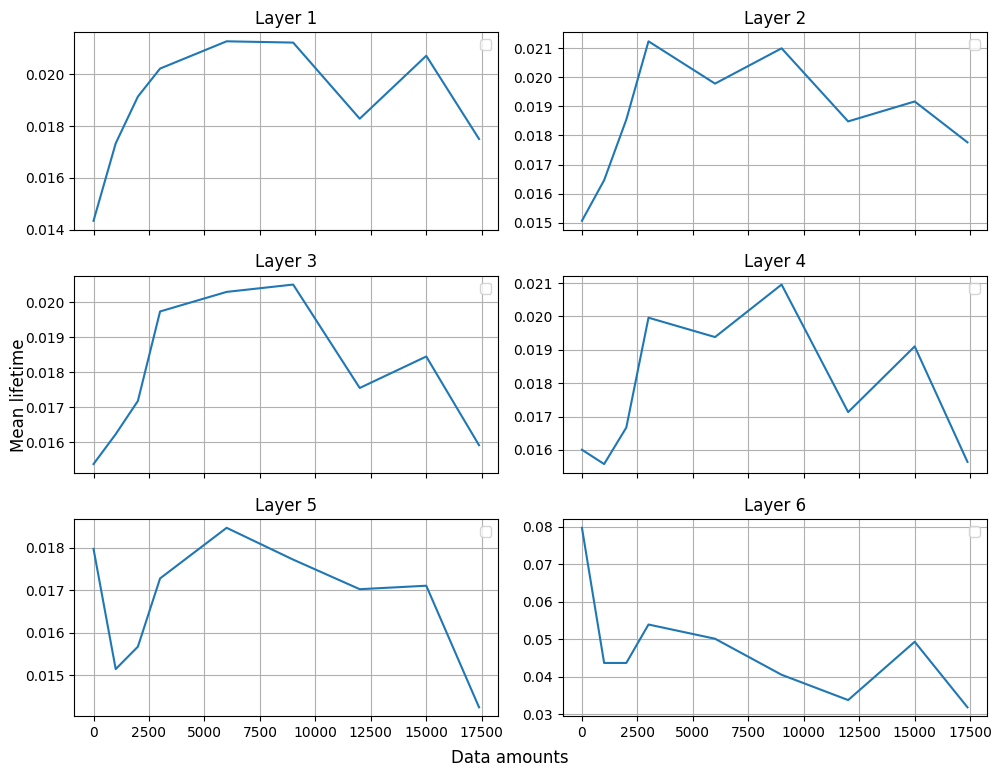

In [150]:
plot_graphs_grid(data_amounts=data_amounts, layers=layers_norm_ent)